# **DATASET SAHAM - GOOGLE COLAB CODE**

# **Import Used**

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **Data Wrangling**

# 1. Saving Data to CSV

In [ ]:
ticker = yf.Ticker('BBCA.JK')
bbca = ticker.history(start="2005-11-01", end="2023-12-31", auto_adjust=False)

bbca.reset_index(inplace=True)
bbca['Date'] = bbca['Date'].dt.date

bbca.to_csv('data_bbca.csv', index=False)

# 2. Read CSV

In [ ]:
data_bbca = pd.read_csv('/content/data_bbca.csv')

# 3. Load Data

In [ ]:
data_bbca.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2009-01-05,700.0,700.0,650.0,700.0,534.262573,76682500,0.0,0.0
1,2009-01-06,700.0,740.0,690.0,700.0,534.262573,86082500,0.0,0.0
2,2009-01-07,715.0,715.0,630.0,675.0,515.181824,65045000,0.0,0.0
3,2009-01-08,625.0,640.0,620.0,625.0,477.020325,53797500,0.0,0.0
4,2009-01-09,600.0,630.0,595.0,600.0,457.939484,59930000,0.0,0.0


# **Data Preprocessing**

# 1. Read Relevant Columns

In [ ]:
data_bbca_filter = data_bbca[['Date', 'Close']]
data_bbca_filter.head()

,Date,Close
0,2009-01-05,700.0
1,2009-01-06,700.0
2,2009-01-07,675.0
3,2009-01-08,625.0
4,2009-01-09,600.0


# 2. Read The Contents of The Data

In [ ]:
data_bbca_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3708 entries, 0 to 3707
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3708 non-null   object 
 1   Close   3708 non-null   float64
dtypes: float64(1), object(1)
memory usage: 58.1+ KB


# 3. Convert Data Tipe

In [ ]:
data_bbca_filter['Date'] = pd.to_datetime(data_bbca_filter['Date'])

<ipython-input-7-571199ff57a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bbca_filter['Date'] = pd.to_datetime(data_bbca_filter['Date'])


# **Data Assessing**

# 1. Checking Data Information and Duplicates

In [ ]:
data_bbca_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3708 entries, 0 to 3707
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3708 non-null   datetime64[ns]
 1   Close   3708 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.1 KB


In [ ]:
data_bbca_filter.isna().sum()

,0
Date,0
Close,0


In [ ]:
print("Jumlah duplikasi: ", data_bbca_filter.duplicated().sum())

Jumlah duplikasi:  0


# 2. Descriptive Statics

In [ ]:
data_bbca_filter.describe()

,Date,Close
count,3708,3708.000000
mean,2016-07-05 06:11:39.029126144,3915.292611
min,2009-01-05 00:00:00,460.000000
25%,2012-10-07 06:00:00,1640.000000
50%,2016-07-28 12:00:00,2937.500000
75%,2020-03-06 18:00:00,6045.000000
max,2023-12-29 00:00:00,9400.000000
std,NaN,2538.693254


# **Data Visualization**

# 1. Line Plot of Close Price Over Time

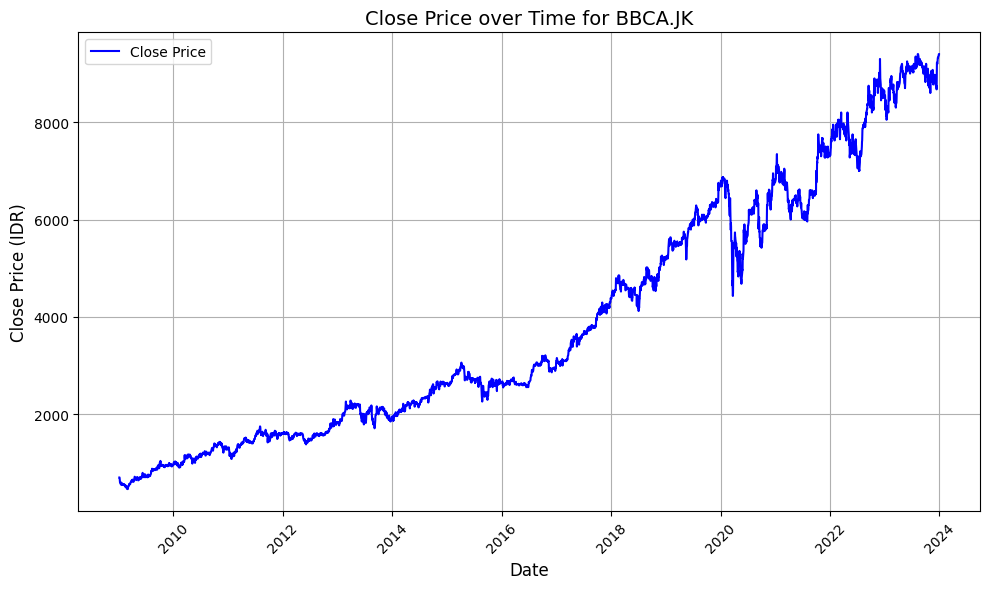

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_bbca_filter['Date'], data_bbca_filter['Close'], label='Close Price', color='blue')

plt.title('Close Price over Time for BBCA.JK', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (IDR)', fontsize=12)

plt.grid(True)
plt.legend()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **2. Monthly Average Close Prime**

# Resampling Data to Monthly Averages

In [ ]:
data_bbca_bulan = data_bbca_filter.copy()

data_bbca_bulan['Date'] = pd.to_datetime(data_bbca_bulan['Date'])

data_bbca_bulan.set_index('Date', inplace=True)

data_per_bulan = data_bbca_bulan['Close'].resample('ME').mean()

data_per_bulan.index = data_per_bulan.index.strftime('%b %Y')

# Display Data

In [ ]:
data_per_bulan.head()

,Close
Date,
Jan 2009,592.368421
Feb 2009,519.750000
Mar 2009,565.500000
Apr 2009,660.750000
May 2009,679.047619


# **Plotting the Monthly Average Close Price**

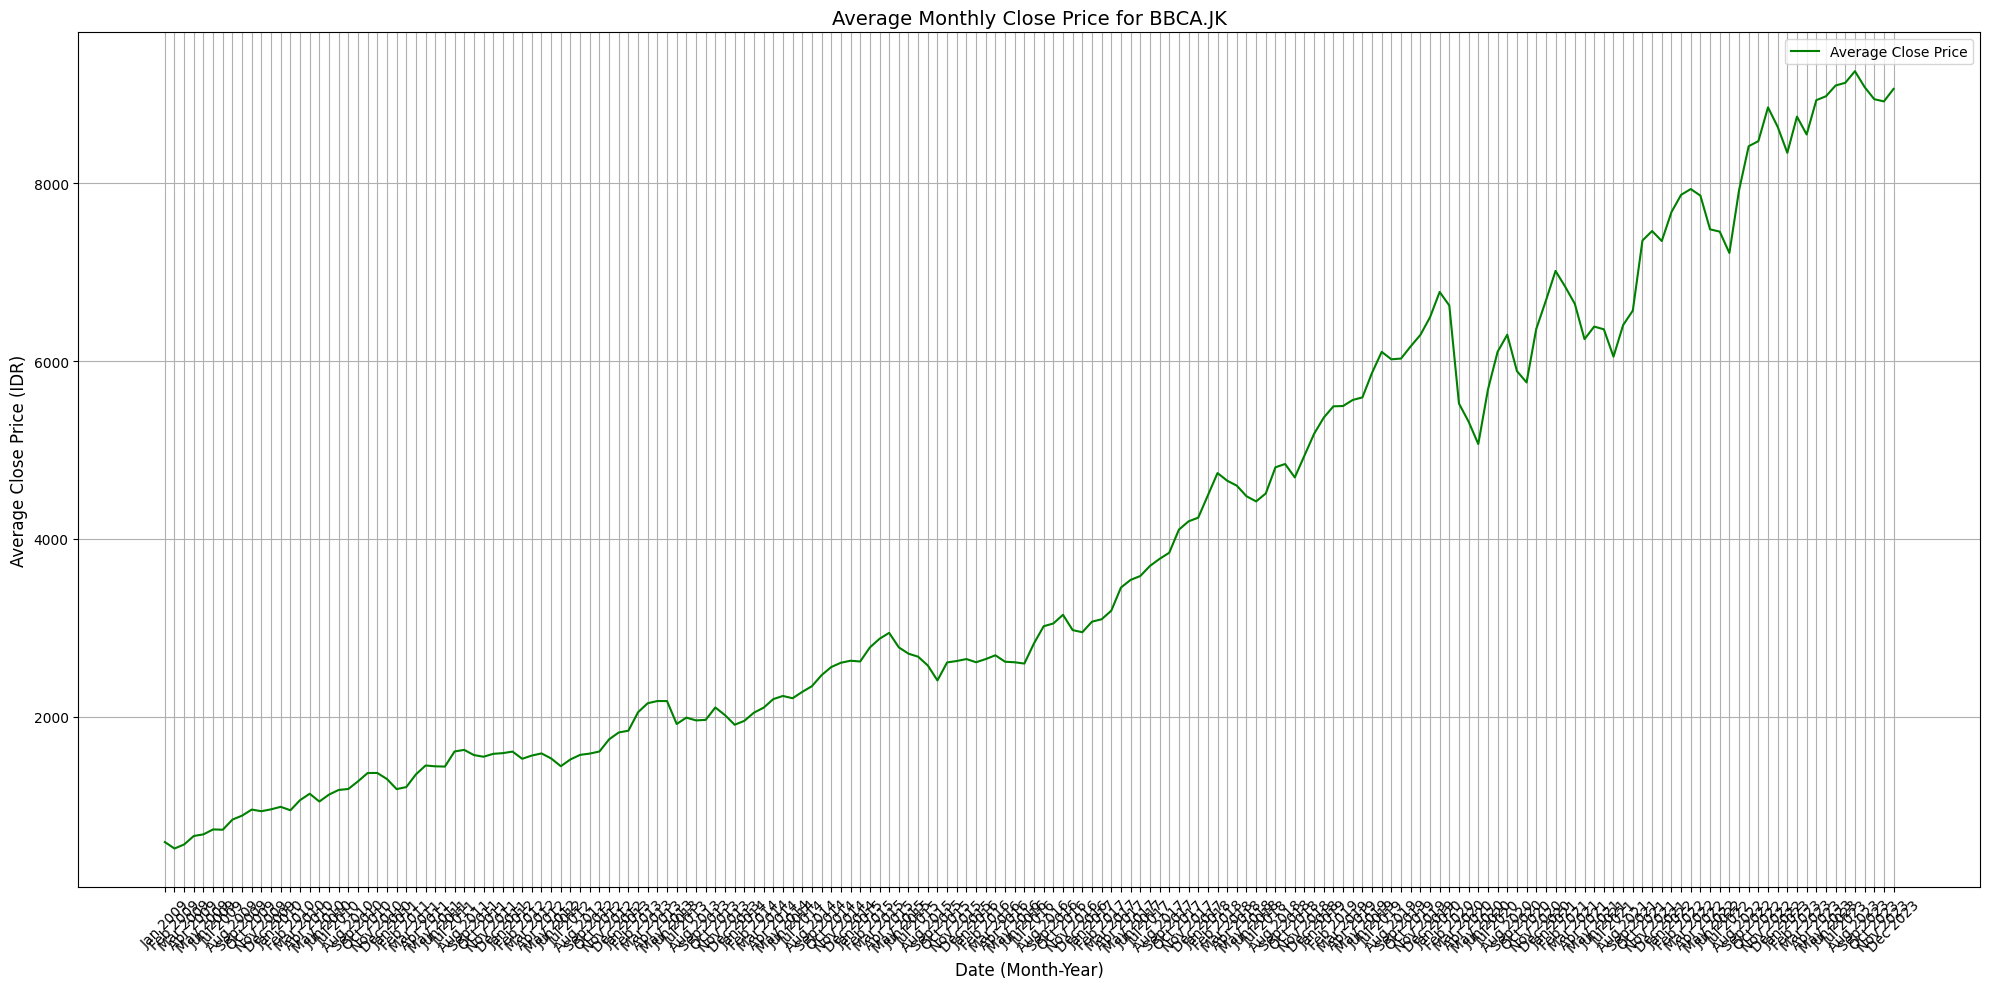

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(data_per_bulan.index, data_per_bulan.values, label='Average Close Price', color='green')

plt.title('Average Monthly Close Price for BBCA.JK', fontsize=14)
plt.xlabel('Date (Month-Year)', fontsize=12)
plt.ylabel('Average Close Price (IDR)', fontsize=12)

plt.grid(True)
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# **Saving Monthly Data to CSV**

In [ ]:
data_per_bulan.to_csv('data_bbca_per_bulan.csv', header=True)